In [2]:
import random
import numpy as np
from utils import plottings
import matplotlib.pyplot as plt

(3, 1, 1, 256, 256)


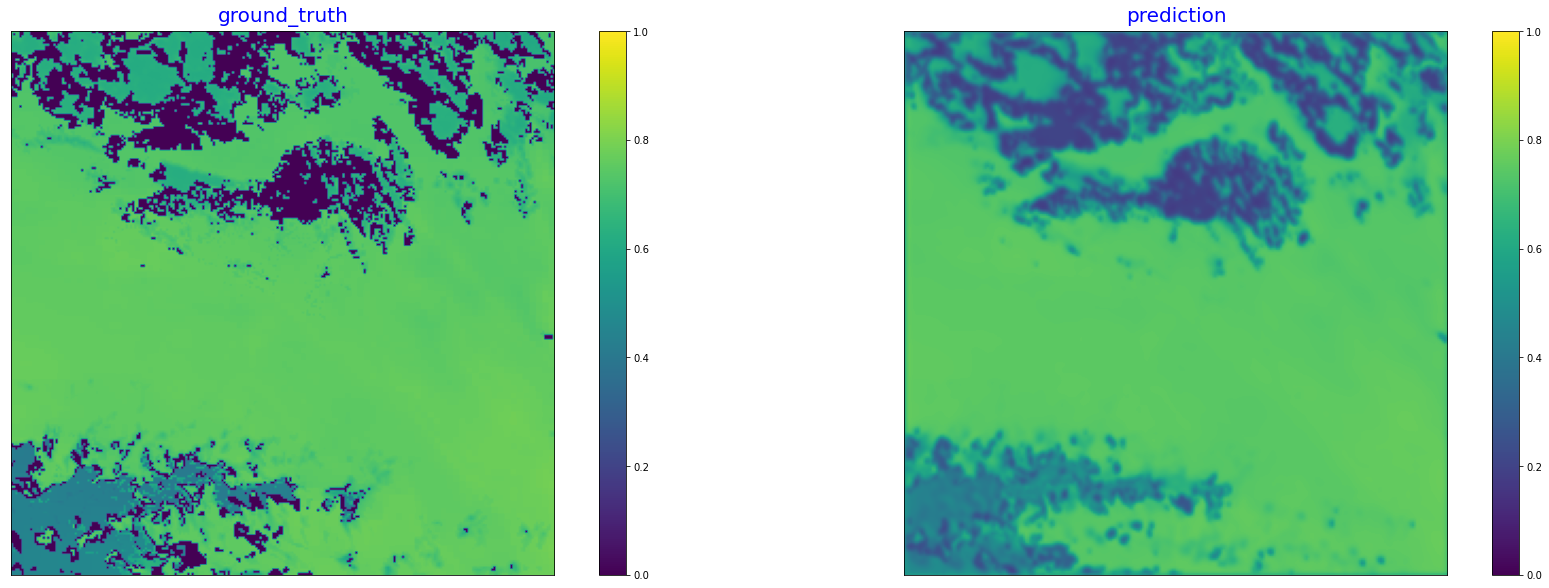

In [7]:
data = np.load('/home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/seq2seq_seq4_hoz1_in1_out1_kernel3_1638157858/prediction.npz')

prediction = data['prediction']
ground_truth = data['ground_truth']
print(ground_truth.shape)
images = [ground_truth[1, 0, 0, :, :], prediction[1, 0, 0, :, :]]
texts = ['ground_truth', 'prediction']

plottings.plot_N(images, texts)


151 93


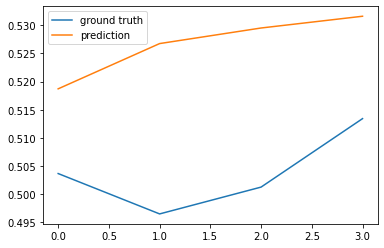

In [43]:
lon, lat = random.randint(0, 255), random.randint(0, 255)
print(lon, lat)
x=range(ground_truth.shape[1])
y1=ground_truth[0, :, 0, lon, lat]
y2=prediction[0, :, 0, lon, lat]
fig = plt.figure()
plt.plot(x, y1, label="ground truth")
plt.plot(x, y2, label="prediction")
plt.legend()
plt.show()

In [1]:
import os 
import time
import logging
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

from utils.options import parse_args, load_param_dict
from utils.data_loader import WMDataset, split_train_val_test
from models import Seq2Seq
from utils.evaluation import rmse_error, r2_error

params = load_param_dict(args=None, mode='test')
    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

dataset = WMDataset(data_path=params['data_path'], 
                        sample_path=params['sample_path'],
                        region_id=params['region_id'], 
                        source_vars=['temperature'],
                        target_vars=['temperature'],
                        seq_len=params['seq_len'],
                        horizon=params['horizon'],
                        use_static=params['use_static'])
    
train_dataset, _, test_dataset = split_train_val_test(dataset)

mode - test
data_path - /home/yaoyi/lin00786/weather4cast/preprocess-data/
sample_path - ./samples.csv
region_id - R1
model_name - Seq2Seq_seq4_hoz1_in1_out1_kernel1
result_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1
gpu_id - 0
num_epochs - 100
batch_size - 32
lr - 0.001
weight_decay - 0.001
patience - 10
log_interval - 1
h_dim - 64
kernel_size - 3
seq_len - 4
horizon - 1
use_static - False
num_test - 1
verbose - True
model_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1/models/epoch=8-val_loss=0.00.ckpt
log_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1/logs
log_file_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1/logs/Seq2Seq_seq4_hoz1_in1_out1_kernel1_test.log


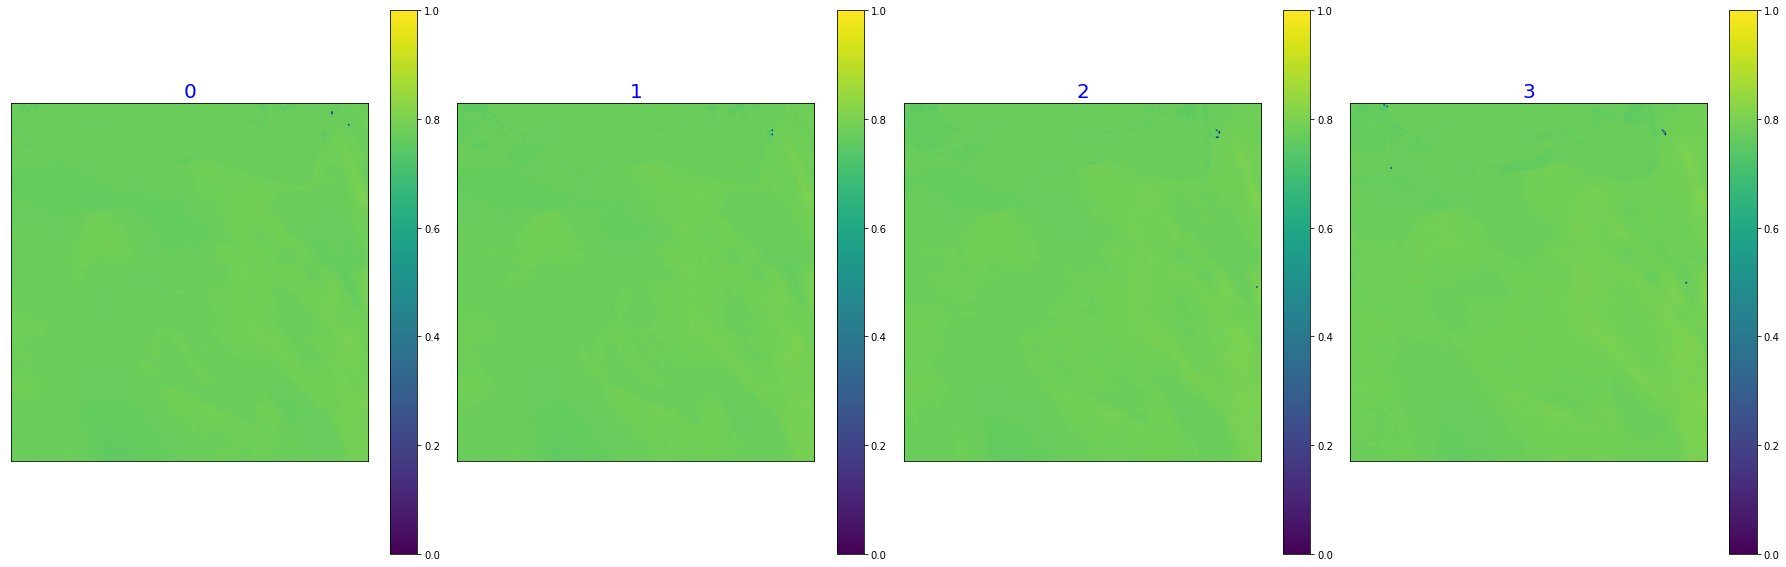

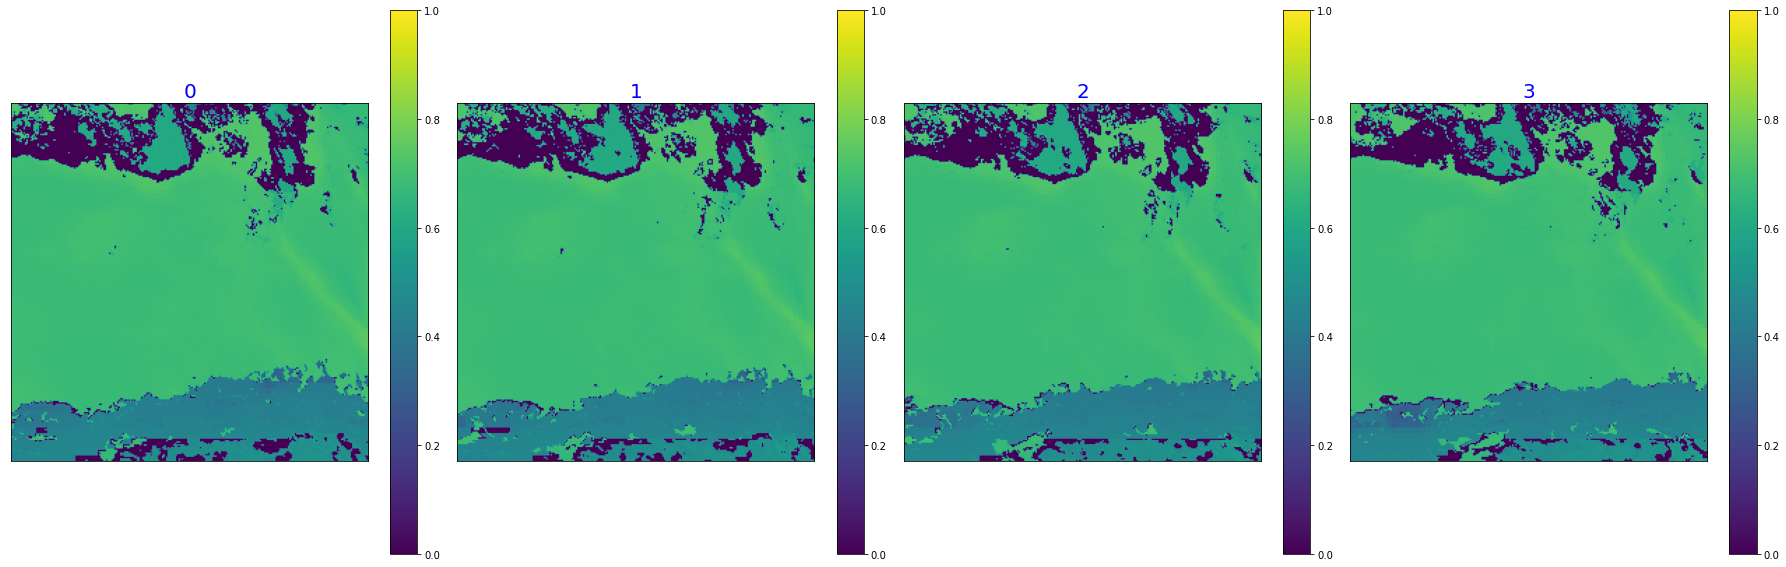

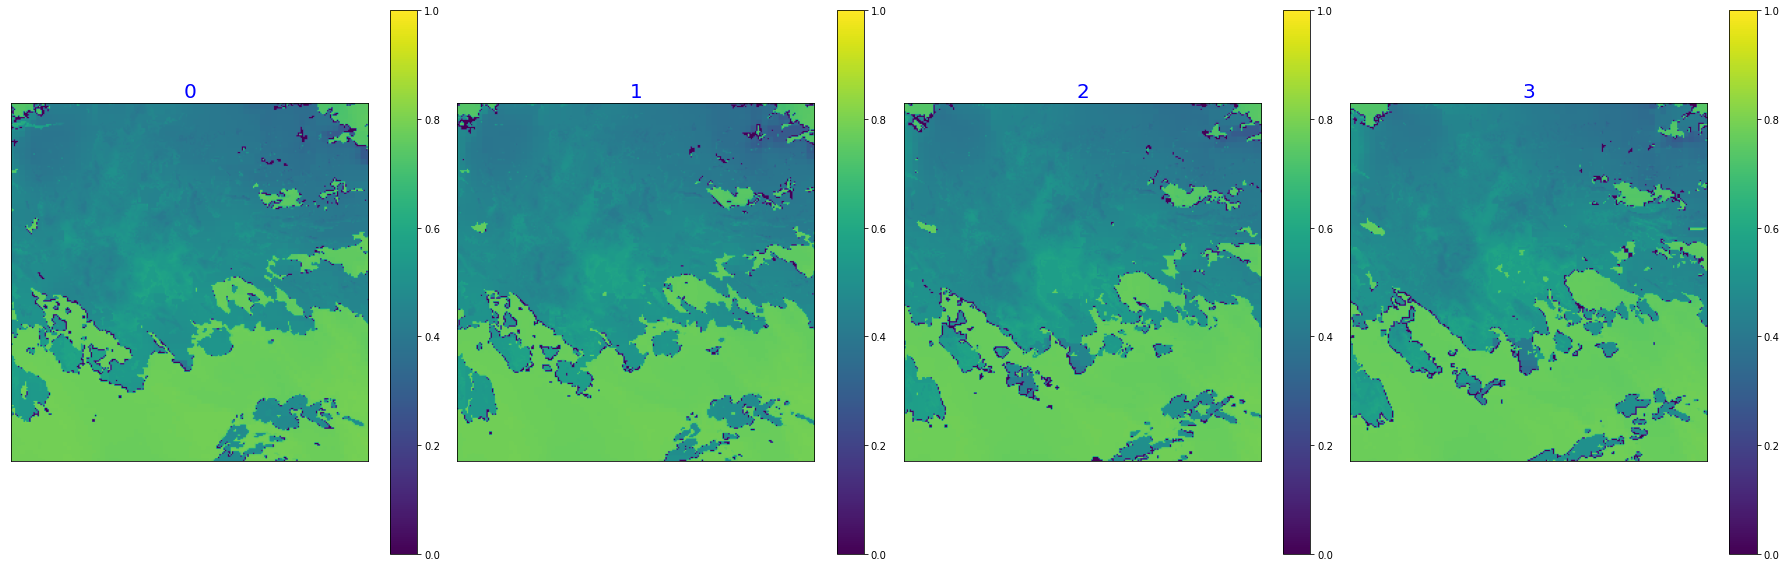

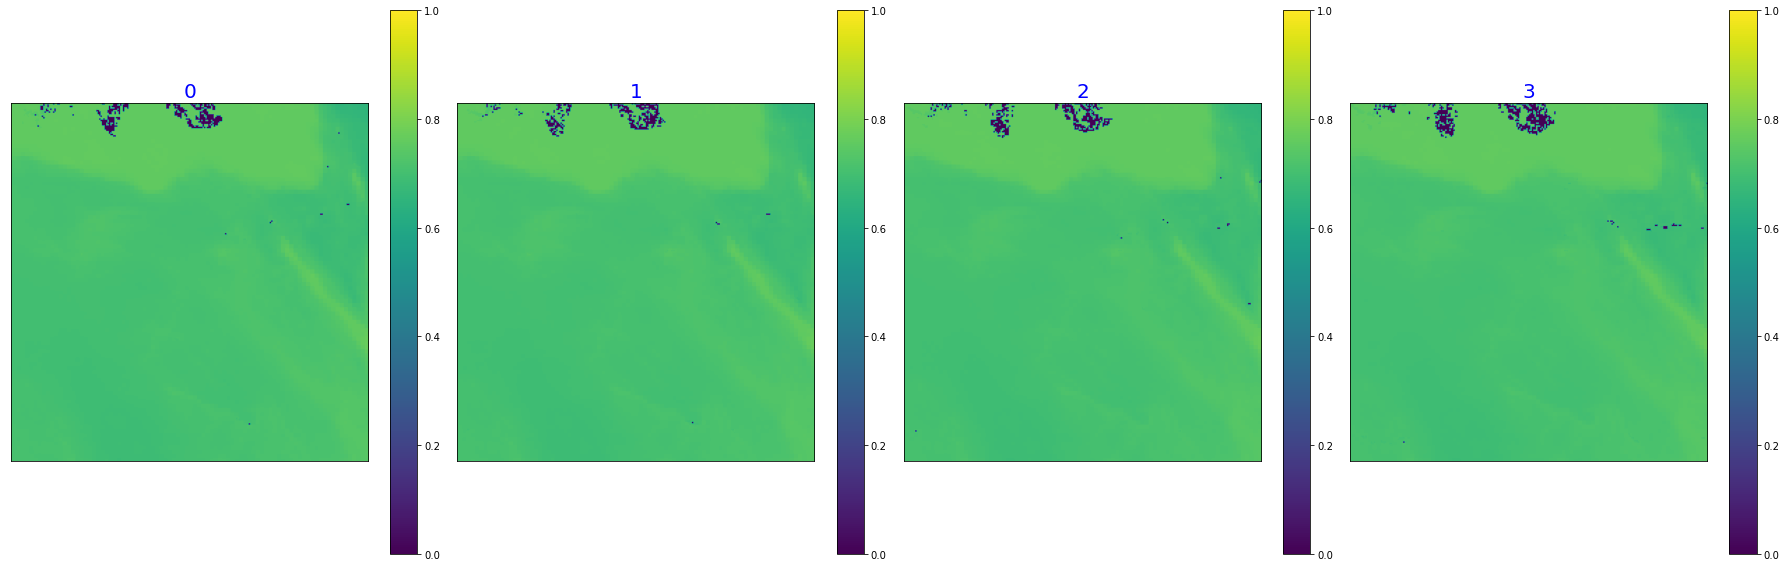

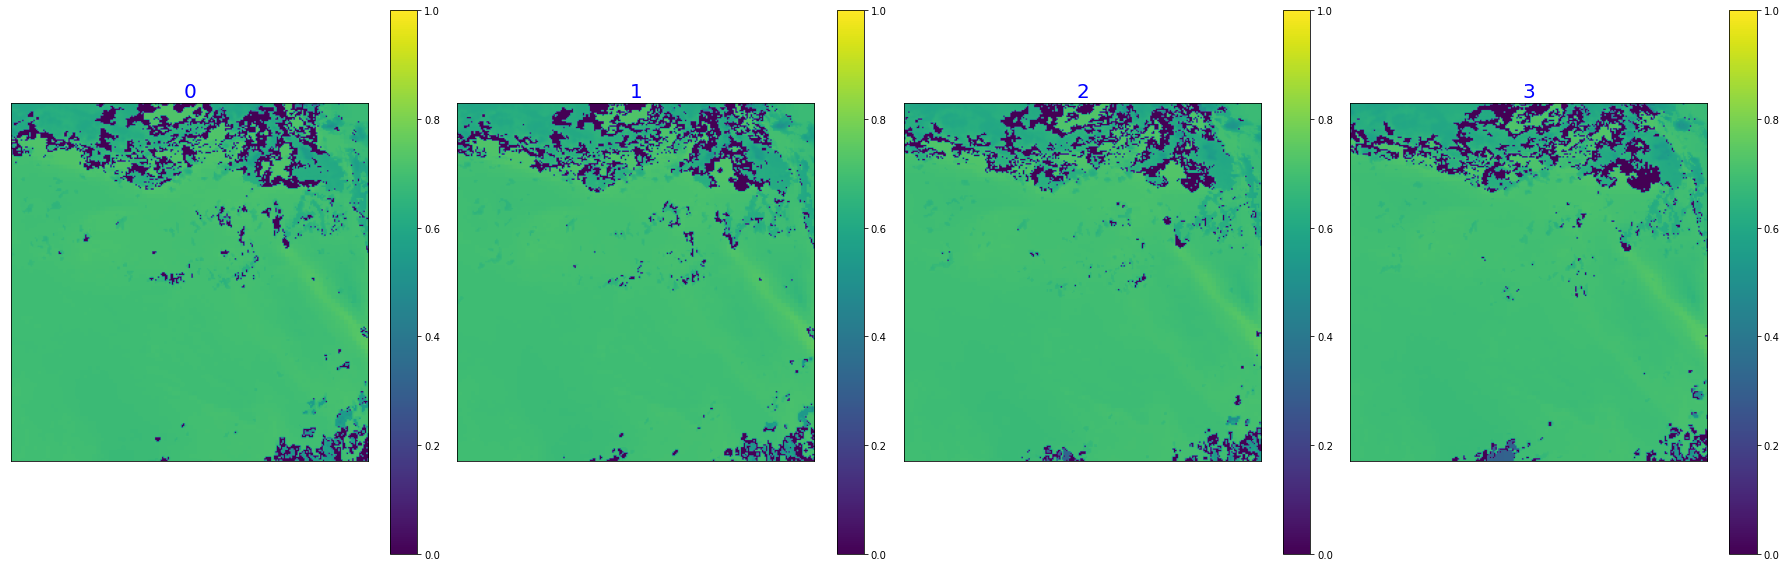

In [7]:
for i in range(5):
    plottings.plot_N([train_dataset[i][0][0, 0, ...], 
                      train_dataset[i][0][1, 0, ...], 
                      train_dataset[i][0][2, 0, ...], 
                      train_dataset[i][0][3, 0, ...]], [0, 1,2,3])
    

In [5]:
train_dataset[0][0].shape

(4, 1, 256, 256)

249 168


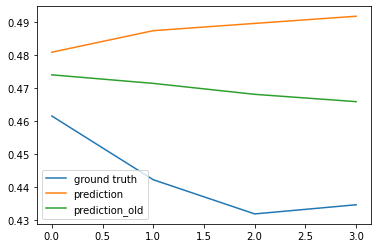

In [50]:
lon, lat = random.randint(0, 255), random.randint(0, 255)
print(lon, lat)
x=range(ground_truth.shape[1])
y1=ground_truth[0, :, 0, lon, lat]
y2=prediction[0, :, 0, lon, lat]
y3=prediction_old[0, :, 0, lon, lat]
fig = plt.figure()
plt.plot(x, y1, label="ground truth")
plt.plot(x, y2, label="prediction")
plt.plot(x, y3, label="prediction_old")

plt.legend()
plt.show()